# Data Manipulation and Visualization Project
## Written by Tanner Wetzel

## Dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [2]:
data = pd.read_csv('Groceries_dataset.csv')

### Q1: import the data in Groceries_dataset.csv into the notebook as a Pandas DataFrame. Check out the first and last 5 rows of the DataFrame. Then show the basic information of the DataFrame. 

In [3]:
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


### Q2: Note that the dates are strings. Create a new Pandas DataFrame that contains the same information but replaces the date strings with three integer columns containing the day, month, and year.

In [5]:
def day(day_str):
    return day_str[:2]

def month(month_str):
    return month_str[3:5]

def year(yr_str):
    return yr_str[6:10]

In [6]:
data['Day'] = data['Date'].apply(day)
data['Month'] = data['Date'].apply(month)
data['Year'] = data['Date'].apply(year)

In [7]:
data.drop(labels = 'Date', axis = 1, inplace = True)

In [8]:
data.head()

,Member_number,itemDescription,Day,Month,Year
0,1808,tropical fruit,21,07,2015
1,2552,whole milk,05,01,2015
2,2300,pip fruit,19,09,2015
3,1187,other vegetables,12,12,2015
4,3037,whole milk,01,02,2015


### Q3: Determine which item was purchased the most frequently.

In [9]:
data['itemDescription'].value_counts().head(1)

whole milk    2502
Name: itemDescription, dtype: int64

### Q4: Determine which member purchased the most items. 

In [10]:
data['Member_number'].value_counts().head(1)

3180    36
Name: Member_number, dtype: int64

### Q5: Determine the distinct items purchased by member 2300. 

In [11]:
filter2300 = data['Member_number'] == 2300
data[filter2300]

,Member_number,itemDescription,Day,Month,Year
2,2300,pip fruit,19,09,2015
5354,2300,sausage,28,04,2015
5642,2300,frankfurter,05,08,2015
9820,2300,pork,16,03,2014
16151,2300,other vegetables,19,09,2015
21503,2300,white wine,28,04,2015
21791,2300,long life bakery product,05,08,2015
25969,2300,fruit/vegetable juice,16,03,2014
36090,2300,flour,19,09,2015
36538,2300,hygiene articles,28,04,2015


### Q6: Determine the items that members 2051 and 3050 both purchased.

In [12]:
bool_filter1 = data['Member_number'] == 2051
bool_filter2 = data['Member_number'] == 3050

In [13]:
d2051 = data[bool_filter1]
d3050 = data[bool_filter2]
dboth = pd.DataFrame()

In [14]:
dboth['itemDescription'] = d3050['itemDescription']
dboth['both_purchased'] = d3050['itemDescription'].isin(d2051['itemDescription'])

In [15]:
bool_filter3 = dboth['both_purchased'] == True
dboth[bool_filter3].drop_duplicates()

,itemDescription,both_purchased
2122,pip fruit,True
2431,frankfurter,True
4161,whole milk,True
4588,other vegetables,True
7499,pork,True
8419,beef,True
23648,soda,True
24289,rolls/buns,True
27703,root vegetables,True


### Q7: Determine the items purchased by member 2051 that member 3050 did not purchase.

In [16]:
bool_filter1 = data['Member_number'] == 2051
bool_filter2 = data['Member_number'] == 3050

In [17]:
d2051 = data[bool_filter1]
d3050 = data[bool_filter2]
dboth = pd.DataFrame()

In [18]:
dboth['itemDescription'] = d2051['itemDescription']
dboth['3051_purchased'] = d2051['itemDescription'].isin(d3050['itemDescription'])

In [19]:
bool_filter3 = dboth['3051_purchased'] == False
dboth[bool_filter3].drop_duplicates()

,itemDescription,3051_purchased
3441,photo/film,False
4564,canned beer,False
7598,beverages,False
7952,fruit/vegetable juice,False
8554,prosecco,False
10083,meat,False
16054,long life bakery product,False
19590,domestic eggs,False
20153,newspapers,False
20823,brown bread,False


### Q8: Create a labeled pie chart for the purchases made by member 1097.

In [20]:
filter1097 = data['Member_number'] == 1097

<AxesSubplot:title={'center':'Member 1097'}>

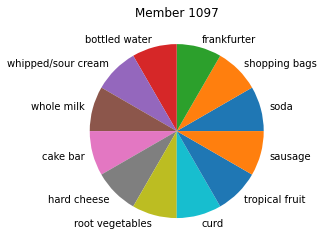

In [21]:
newdata = data[filter1097]['itemDescription'].drop_duplicates()
newdata.value_counts().plot(kind = 'pie', ylabel = '', title = 'Member 1097')

### Q9: Determine how many turkeys were purchased.

In [22]:
turkeys = data['itemDescription'] == 'turkey'

In [23]:
data[turkeys].value_counts().sum()

80

### Q10: Create a labeled, horizontal bar chart showing the number of turkeys purchased in each month of the year.

In [24]:
tur_per_mon = data[turkeys].value_counts().groupby(by = 'Month').sum()

<AxesSubplot:title={'center':'Turkeys Purchased Per Month'}, ylabel='Month'>

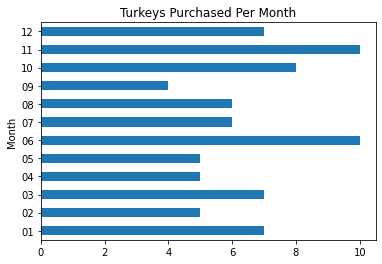

In [25]:
tur_per_mon.plot(kind = 'barh', title = 'Turkeys Purchased Per Month', xlabel = 'Month', ylabel = 'Turkeys')
